
**Heart Failure Prediction on #kaggle via @KaggleDatasets https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data?utm_medium=social&utm_campaign=kaggle-dataset-share&utm_source=twitter **

In [1]:
import os
os.getcwd()

'C:\\Users\\user'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

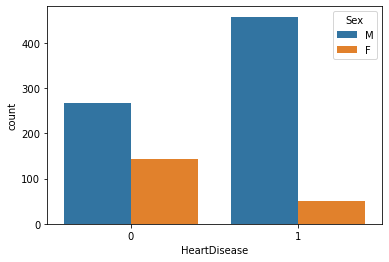

In [5]:
sns.countplot(data['HeartDisease'],hue=data['Sex'])

In [6]:
data.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [7]:
data.ChestPainType=data.ChestPainType.map({'ATA':0,'NAP':1,'ASY':2,'TA':3})

In [8]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
categorical=['Sex','RestingECG','ExerciseAngina','ST_Slope']
for i in categorical:
  data[i]=lbl.fit_transform(data[i])

In [9]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,1,172,0,0.0,2,0
1,49,0,1,160,180,0,1,156,0,1.0,1,1
2,37,1,0,130,283,0,2,98,0,0.0,2,0
3,48,0,2,138,214,0,1,108,1,1.5,1,1
4,54,1,1,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,2,144,193,1,1,141,0,3.4,1,1
915,57,1,2,130,131,0,1,115,1,1.2,1,1
916,57,0,0,130,236,0,0,174,0,0.0,1,1


<AxesSubplot:>

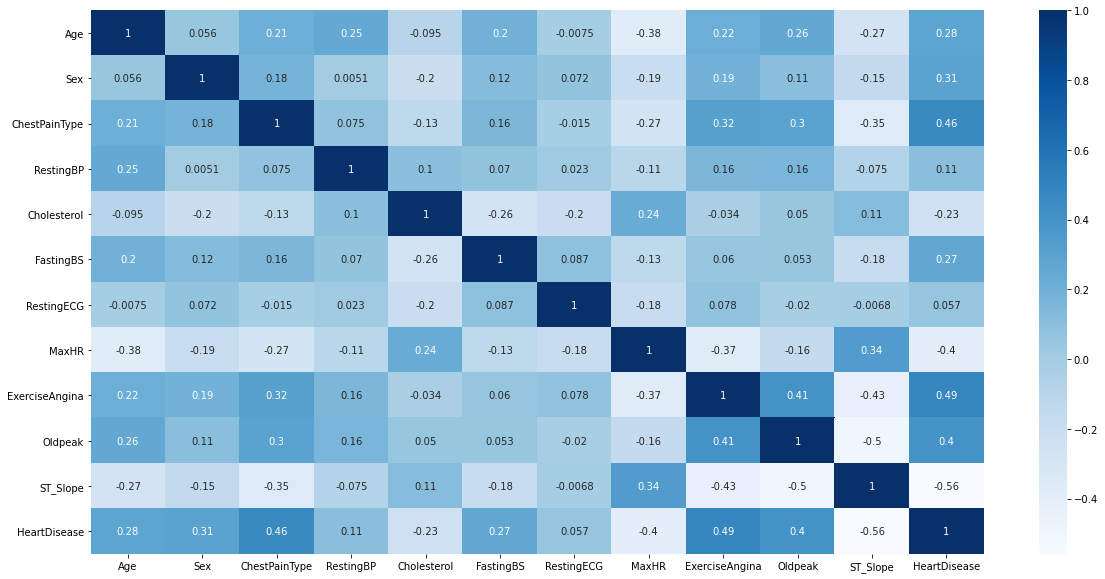

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),cmap='Blues', annot=True)

In [11]:
y=data['HeartDisease']
X=data.drop('HeartDisease',axis=1)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# LOGISTIC

In [49]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(penalty='l2',C=1,max_iter=100)
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)
y_pred1

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [50]:
y_pred1=y_pred1.reshape(-1,1)
y_test

668    0
30     1
377    1
535    1
807    0
      ..
211    1
745    1
584    1
878    0
451    1
Name: HeartDisease, Length: 184, dtype: int64

In [51]:
model1.score(X_test,y_test)

0.8315217391304348

# KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier 
l=[]
for i in range(1,9): 
    Model2= KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2 )  
    Model2.fit(X_train, y_train)
    k=Model2.score(X_test,y_test)
    l.append({k,i})

In [48]:
l

[{0.8097826086956522, 1},
 {0.7554347826086957, 2},
 {0.8478260869565217, 3},
 {0.8369565217391305, 4},
 {0.8695652173913043, 5},
 {0.8586956521739131, 6},
 {0.8804347826086957, 7},
 {0.8532608695652174, 8}]

In [ ]:
## clearly for n==7 our score is maximum

In [36]:
Model2= KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2 )  
Model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [39]:
y_pred2=Model2.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred2,y_test)

array([[66, 11],
       [11, 96]], dtype=int64)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



# Naive Bias

In [43]:
from sklearn.naive_bayes import GaussianNB
Model3 = GaussianNB()
y_pred3= Model3.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        77
           1       0.88      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [46]:
Model3.score(X_test,y_test)

0.842391304347826

# Conclusion
**Accuracy from Logistic Regression : 83 percent**<br>
**Accuracy from KNN : 88 percent**<br>
**Accuracy from Naive Bias : 84 percent**<br>
